In [1]:
import pandas as pd
from neuralprophet import NeuralProphet

df = pd.read_csv('DailyDelhiClimateTrain.csv',parse_dates=['date'])
df = df[['date','meantemp']]
df.rename(columns={'date':'ds','meantemp':'y'},inplace=True)

In [2]:
df

,ds,y
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632


In [3]:
model = NeuralProphet(
    growth='linear',# Determine trend types: 'linear','discontinuous','off'
    changepoints=None,#list of dates that may include change points(None -> automatic)
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    seasonality_mode='additive',
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,#Dimension of hidden layers of AR-Net
    ar_sparsity=None,#Sparcity in the AR coefficients
    learning_rate=None,
    epochs=40,
    loss_func='Huber',
    normalize='auto',#Type of normalization ('minmax','standardize','soft','off')
    impute_missing=True,
    log_level=None,#Determine the logging level of the logger object   
)

In [4]:
metrics = model.fit(df,validate_each_epoch=True,freq='D')
future = model.make_future_dataframe(df,periods=365,n_historic_predictions=len(df))
forecast = model.predict(future)

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 17.55it/s, SmoothL1Loss=0.00185, MAE=1.62, RegLoss=0, MAE_val=1.56, SmoothL1Loss_val=0.00189]


Text(0.5, 1.0, 'Mean Temperature in Delhi')

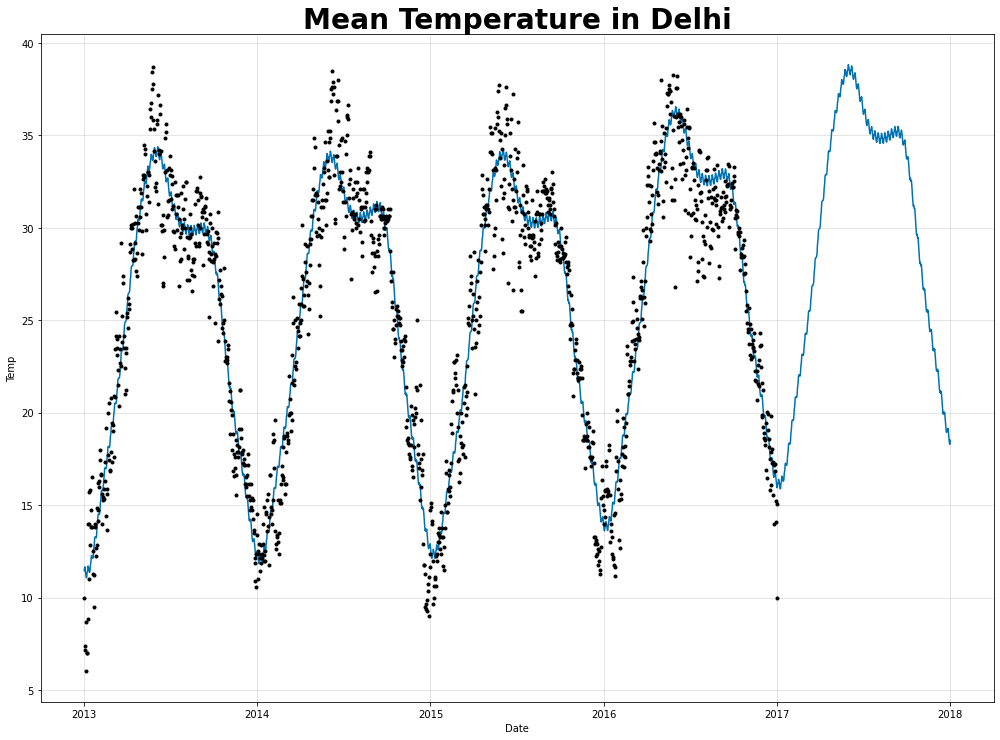

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(14,10))
model.plot(forecast,xlabel='Date',ylabel='Temp',ax=ax)
ax.set_title('Mean Temperature in Delhi',fontsize=28,fontweight='bold')

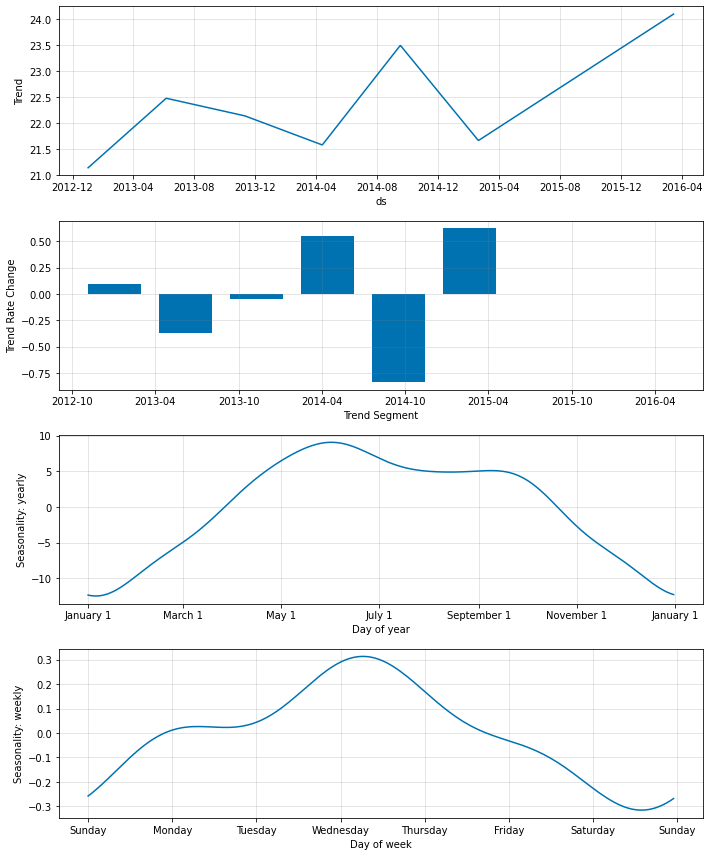

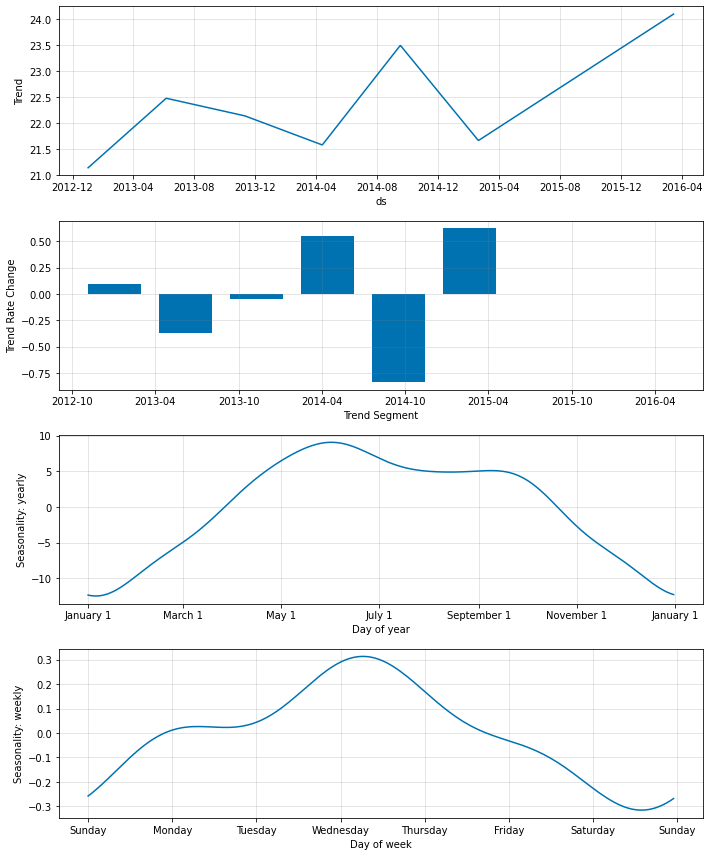

In [6]:
model.plot_parameters()

The model loss using Mean Absolute Error(MAE) is plotted below. You can use the Smoothed L1-Loss function.

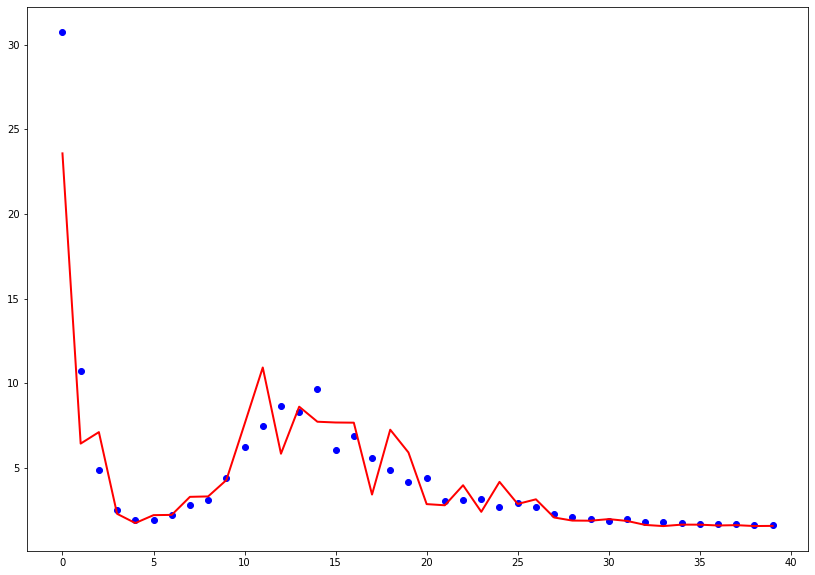

In [8]:
fig,ax = plt.subplots(figsize=(14,10))
ax.plot(metrics['MAE'],'ob',linewidth=6,label='Training Loss')
ax.plot(metrics['MAE_val'],'-r',linewidth=2,label='Validation Loss')

# You can sue metrics['SmoothL1Loss'] and metrics['SmoothL1Loss_val'] too